In [1]:
from common import utils
import random
u=utils(False)

Ce cours a √©t√© r√©g√©n√©r√© le 2018-08-23 10:22:11.362733


# Les scripts

## Le shell

L'interface avec les syst√®mes d'exploitation a une [longue histoire](http://cristal.inria.fr/~weis/info/commandline.html). Il y a toujours eu une fa√ßon d'interagir avec les ordinateurs qui a √©volu√© avec le temps. On peut citer plusieurs grands mouvements, mais globalement :

  * jusqu'√† la fin des ann√©es 1960, les syst√®mes de *batch*
  * De 1968 √† 1984, c'est l'essor des interfaces avec ligne de commande
  * √Ä partir du milieu des ann√©es 80, les interfaces graphiques sortent des laboratoires pour arriver chez les particuliers : interface Mac par Apple en 1984 et Windows 1.0 en 1985.
  * Depuis les ann√©es 2010, d√©veloppement d'interfaces encore en progression: interfaces tactiles, commande vocale, r√©alit√© augment√©e‚Ä¶

Le shell est un nom g√©n√©rique pour certains types d'interface en ligne de commande. Ils permettent de faire des *scripts*, reproduisant ainsi les fonctionnalit√©s des anciens syst√®mes de batch, mais aussi un travail interactif. √Ä l'aide d'un langage sp√©cifique, il est possible de contr√¥ler une application dont l'utilit√© principale est de lancer d'autres applications. Le langage est suffisamment √©volu√© pour permettre de faire des programmes rudimentaires.

Il existe un (et m√™me plusieurs) shell(s) pour les principaux syst√®mes d'exploitation pour ordinateurs personnels (Windows, Mac, Linux).

Le shell selon les syst√®mes d'exploitation :

  * Windows (bas√© sur MSDOS): `command.com`
  * Windows (bas√© sur NT): `cmd.exe`
  * Windows Vista/XP : Powershell
  * Linux/Mac OS X : `bash` mais aussi `dash`, `posh`, `tcsh` (et aussi ceux du dessous).
  * Anciens UNIX : `sh`, `csh`, `ksh` et tr√®s souvent ceux du dessus.
  * Mac OS (‚â§9) : `Hypercard` pourrait √™tre consid√©r√© comme un shell. 

L'id√©e est que le shell est une coquille autour de l'ordinateur, vu comme le mat√©riel plus le noyau plus les utilitaires de base. L'analogie reste pour les interfaces graphiques, parfois qualifi√©es en anglais de *graphic shell*.

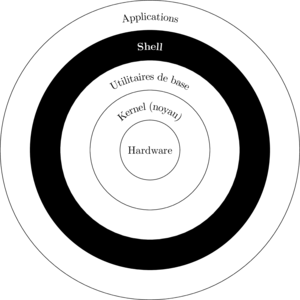

In [2]:
%%tikz -l decorations.text,calc,arrows.meta -s 300,300
\coordinate (O) at (0,0);
\draw (O) circle (5);
\draw[fill=black] (O) circle (4);
\draw[fill=white] (O) circle (3);
\draw (O) circle (2);
\draw (O) circle (1);

\node (O) {Hardware};
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Kernel (noyau)}},decorate] (1.5,0) arc (0:180:1.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Utilitaires de base}},decorate] (2.5,0) arc (0:180:2.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={|\bfseries\color{white}|Shell}},decorate] (3.5,0) arc (0:180:3.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Applications}},decorate] (4.5,0) arc (0:180:4.5);


## Le fonctionnement du shell

Nous allons √©tudier en particulier le fonctionnement du shell `bash` qui est utilis√© comme shell par d√©faut sous Linux, Mac OS et m√™me d'autres syst√®mes d√©riv√©s d'Unix.

Le shell a deux modes de fonctionnement : 
  * *interactif* o√π il fonctionne selon le principe d'une boucle REPL (read-eval-print loop)
  * *script* o√π il lit un fichier d'instructions, et ex√©cute au fur et √† mesure les instructions qui lui sont donn√©es.

Il n'y a pas, √† votre niveau, de diff√©rences significative entre les deux modes : √† part l'affichage d'un *prompt* lorsque le shell attend des instructions en mode interactif, le langage est le m√™me. Si vous tapez des instructions une √† une dans 

> Note : les boucles REPL sont assez fr√©quentes dans les outils informatiques. C'est le mode de fonctionnement typique des langages interpr√©t√©s, au nombre desquels on peut compter le shell, Python, PHP, Perl, Prolog, R, Gnuplot, Postscript, etc. D'autres langages peuvent √™tre adapt√©s √† fonctionner en REPL mais ce n'est pas leur fonctionnement par d√©faut, et souvent accompagn√© de diminution de leurs possibilit√©s.

Il est possible dans les notebooks Jupyter que vous lisez de faire des scripts shell, mais un certain nombre de choses vont √™tre limit√©es :

  * Impossibilit√© de lire le clavier
  * l'affichage se fait dans un terminal pauvre, avec peu de capacit√©s (pas de gras, pas de couleur).
  
Pour ces raisons, il vous est recommand√© d'essayer de taper les commandes dans un terminal lorsque vous travaillez en mode interactif. Le terminal est une application qui sert essentiellement √† afficher du texte, √† lire le clavier et √† envoyer ce qui est tap√© √† une autre application qui tourne _√† l'int√©rieur du terminal_, typiquement, le shell.

Des fois, l'analyse d'une ligne ne suffit pas √† savoir comment ex√©cuter : dans ce cas, l'analyse reste "en suspens", et sans rien ex√©cuter, le shell va chercher √† avoir une "phrase" correcte avant de faire quelque chose.

C'est l'exemple de la boucle dans ce qui va suivre.

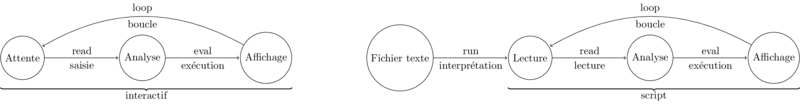

In [3]:
%%tikz -l automata,positioning,decorations.pathreplacing,patterns -s 800,400
\node[node distance=2.5cm,state] (0) {Attente};
\node[node distance=2.5cm,state] (1) [right=of 0] {Analyse};
\node[node distance=2.5cm,state] (2) [right=of 1] {Affichage};

\node[node distance=2.5cm,state] (3) [right=of 2] {Fichier texte};
\node[node distance=2.5cm,state] (4) [right=of 3] {Lecture};
\node[node distance=2.5cm,state] (5) [right=of 4] {Analyse};
\node[node distance=2.5cm,state] (6) [right=of 5] {Affichage};

\path[->,shorten >=1pt]
    (0) edge                node[below] {saisie}    node[above] {read} (1)
    (1) edge                node[below] {ex√©cution} node[above] {eval} (2)
    (2) edge [bend right]   node[below] {boucle}    node[above] {loop} (0)

    (3) edge                node[below] {interpr√©tation} node[above] {run} (4)
    (4) edge                node[below] {lecture}        node[above] {read} (5)
    (5) edge                node[below] {ex√©cution}      node[above] {eval} (6)
    (6) edge [bend right]   node[below] {boucle}         node[above] {loop} (4)
    ;
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (0.west) -- (2.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {interactif};
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (4.west) -- (6.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {script};




### Un script shell
Ouvrir un √©diteur de texte, saisir un programme.

La premi√®re ligne d'un script shell doit √™tre `#! /bin/sh`. Cette ligne ¬´ magique ¬ª permet au syst√®me de savoir quel interpr√©teur utiliser.

Ensuite pour ex√©cuter le script, deux possibilit√©s :

  * Dans un terminal, taper `sh nomduscript`
  * Dans un terminal, une fois pour toute : autoriser √† ex√©cuter le script `chmod +x nomduscript` puis √† chaque fois qu'on veut l'interpr√©ter : `./nomduscript`.

Cette partie un peu ¬´ magique ¬ª a des explications (et vous verrez du coup d'autres fa√ßons de faire avant la fin de ce module, mais les expliquer en d√©tail serait trop compliqu√© √† ce stade.

Traditionnellement, on rajoute une extension `.sh` aux scripts shells, mais ce n'est pas une n√©cessit√©, et dans certains contextes, pas une bonne id√©e.

Vous n'√™tes pas oblig√© de fermer l'√©diteur de texte pour interpr√©ter (on dit aussi ex√©cuter, lancer), mais par contre, il faut bien sauvegarder le script avant de le lancer.

### Le fonctionnement du terminal

Anciennement, un terminal √©tait un p√©riph√©rique sp√©cifique (il en existait des tas). Ce n'√©tait pas forc√©ment un ordinateur complet, m√™me si certains √©taient capable d'avoir un syst√®me d'exploitation fonctionnel (par exemple, le minitel).

![Terminal VT 220 by Adamantios on wikimedia](./DEC-VT220-0a.jpg "VT220 by Adamantios on wikimedia")

Le terminal de nos jours est une application dont les fonctions sont :

 1. Afficher du texte fourni par une autre *application interne*
 2. Lire le clavier et afficher les touches tap√©es
 3. G√©rer certaines touches sp√©ciales (retour arri√®re)
 4. Lorsqu'un retour √† la ligne est tap√©, rendre disponible le texte tap√© pour l'application interne.
 
Par d√©faut, le terminal a comme *application interne* un shell, ce qui fait qu'on peut y taper des commandes du shell et obtenir un retour.


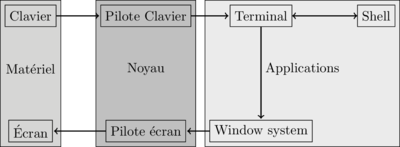

In [4]:
%%tikz -l shapes,arrows,fit -x \pgfdeclarelayer{background}\pgfsetlayers{background,main}
\tikzstyle{block} = [draw, rectangle, minimum height=1.6em, minimum width=2em, node distance=3cm]
\tikzstyle{arrow} = [shorten >=1pt,->, thick]
\tikzstyle{dblarrow} = [thick,<->]
\node[block] (keyboard) {Clavier};
\node[block,right of=keyboard] (driverKeyboard) {Pilote Clavier};
\node[block,right of=driverKeyboard] (terminal) {Terminal};
\node[block,right of=terminal] (shell) {Shell};
\node[block,below of=terminal] (window) {Window system};
\node[block,left of=window] (driverScreen) {Pilote √©cran};
\node[block,left of=driverScreen] (screen) {√âcran};

\draw [arrow] (keyboard) -- (driverKeyboard);
\draw [arrow] (driverKeyboard) -- (terminal);
\draw [arrow] (terminal) -- (window);
\draw [arrow] (window) -- (driverScreen);
\draw [arrow] (driverScreen) -- (screen);
\draw [dblarrow] (terminal) -- (shell);
\begin{pgfonlayer}{background}
\node[fill=black!30,fit=(driverKeyboard)(driverScreen), block] {Noyau};
\end{pgfonlayer}
\begin{pgfonlayer}{background}
\node[fill=black!20,fit=(keyboard)(screen), block] {Mat√©riel};
\end{pgfonlayer}
\begin{pgfonlayer}{background}
\node[fill=black!10,fit=(terminal)(window)(shell), block] {Applications};
\end{pgfonlayer}

In [5]:
%%sh
# La premi√®re ligne sert √† indiquer que le programme n'est pas en python, mais dans un autre langage
# Ici, en shell
# Un petit script, qui montre deux commandes diff√©rentes, une boucle, une variable. 
echo "Hello, world!"
echo "-----"
head -n 5 inventaire.txt # affiche les cinq premi√®res lignes de inventaire.txt
echo "-----"
for i in 1 2 3
do
    echo "$i"
done
echo "J'irai dans les bois."

Hello, world!
-----
Une pierre 
deux maisons 
trois ruines 
quatres fossoyeurs 
un jardin 
-----
1
2
3
J'irai dans les bois.


### Syntaxe de base du shell

Une ligne de commande se pr√©sente sous la forme de mots s√©par√©s par des espaces :

    commande mot1 mot2 mot3

Un mot mis entre guillemets `"comme √ßa"` est un seul mot, m√™me s'il y a un ou plusieurs espaces au milieu. Pareil pour un mot `'entre apostrophes'`. Mais sinon, les espaces s√©parent les mots.

Les mots vont servir d'argument √† la commande et  sont de divers types :

  * des cha√Ænes de caract√®res
  * des noms de fichiers
  * des expressions plus complexes
  * des options (qui viennent modifier le sens de la commande) en g√©n√©ral introduit par un tiret (ou deux).

Pour pouvoir faire des scripts shells, il va falloir apprendre un certain nombre de commandes basiques. Comme des briques √©l√©mentaires, ces commandes pourront ensuite √™tre enchain√©es pour former de v√©ritables programmes. Pour ce cours, une cinquantaine de commandes devront √™tre connues.

Lorsqu'il y a des options, elles sont g√©n√©ralement mises juste derri√®re le nom de la commande. Les options peuvent avoir besoin de valeurs pour fonctionner, elles "consomment" alors un argument qui du coup ne sera pas utilis√© comme "argument principal".

√Ä noter, plusieurs espaces entre les mots comptent comme un seul espace. Si vous voulez un mot *vide*, il faut le mat√©rialiser comme ceci : `echo "Un" "" "vide"`

**Commentaires:** Il est bien s√ªr possible de faire des commentaires dans un script shell. Un `#` qui n'est pas prot√©g√© sera interpr√©t√© comme le d√©but d'un commentaire qui court jusqu'√† la fin de la ligne.

**Caract√®res sp√©ciaux et protection:** les caract√®res sp√©ciaux peuvent tous √™tre prot√©g√©s contre leur interpr√©tation sp√©ciale, et simplement √™tre eux-m√™mes. Pour les prot√©ger, il suffit de :

  * mettre un backslash `\` devant, ou
  * mettre l'expression entre apostrophes droites `'...'` (sauf pour l'apostrophe droite, du coup), ou
  * mettre l'expression entre guillemets droits `"..."` (sauf pour dollar, guillemet droit, backslash et backquote).

Comme il n'y a pas de notion de fin de cha√Æne lorsqu'on arrive sur une apostrophe fermante ou un guillemet fermant mais uniquement de mots, on peut utiliser plusieurs de ces trucs dans le m√™me mot, comme par exemple `echo \#'"'"'"` qui affiche `#"'`

**Retour √† la ligne:** Deux commandes sont s√©par√©es par un retour √† la ligne, ou par un point-virgule (non prot√©g√©, donc). La suite d'instruction suivante :

    echo "Bonjour..."
    echo "...le monde !"

est identique √† :

    echo "Bonjour..." ; echo "...le monde !"

Une diff√©rence : en mode interactif, apr√®s un retour √† la ligne, la commande est trait√©e imm√©diatement, et suivie de l'affichage du prompt. Dans un script, cette diff√©rence dispara√Æt compl√®tement.

In [6]:
%%sh
echo "Observer les diff√©rences entre les diff√©rents comportements"
echo "---- -n 12 (une option avec une valeur) ----"
head -n 12 inventaire.txt
echo "---- -n 2 -v (deux options dont une avec une valeur) ----"
head -n 2 -v inventaire.txt
echo "---- -n2 -v (deux options dont une avec une valeur coll√©e) ----"
head -n2 -v inventaire.txt
echo "---- -n 5 -v (deux options et deux arguments) ----"
head -n 5 -v inventaire.txt common.py
echo "---- pas d'option  ----"
head inventaire.txt
echo "---- fini ----"

Observer les diff√©rences entre les diff√©rents comportements
---- -n 12 (une option avec une valeur) ----
Une pierre 
deux maisons 
trois ruines 
quatres fossoyeurs 
un jardin 
des fleurs 

un raton laveur 

une douzaine d'hu√Ætres un citron un pain 
un rayon de soleil 
une lame de fond 
---- -n 2 -v (deux options dont une avec une valeur) ----
==> inventaire.txt <==
Une pierre 
deux maisons 
---- -n2 -v (deux options dont une avec une valeur coll√©e) ----
==> inventaire.txt <==
Une pierre 
deux maisons 
---- -n 5 -v (deux options et deux arguments) ----
==> inventaire.txt <==
Une pierre 
deux maisons 
trois ruines 
quatres fossoyeurs 
un jardin 

==> common.py <==
from __future__ import print_function
import math
import random
from IPython.display import display, Markdown, Latex, HTML
import ipywidgets as widgets
---- pas d'option  ----
Une pierre 
deux maisons 
trois ruines 
quatres fossoyeurs 
un jardin 
des fleurs 

un raton laveur 

une douzaine d'hu√Ætres un citron un pain 
----

### Variables

Pour √™tre suffisamment souple, le shell dispose d'un syst√®me de variable. Toutefois, ces variables ne sont que des cha√Ænes de caract√®res.

Pour donner une valeur √† une variable, il suffit d'√©crire `NOM=valeur`
La valeur doit √™tre un seul mot (s'il y a des espaces il faut les prot√©ger en les mettant entre guillemets).

Attention : il ne doit par contre pas y avoir d'espaces autour du signe `=`.

Pour utiliser la valeur d'une variable, il suffit d'√©crire `$NOM` dans la ligne de commande ou la ligne de script. Si le `$` n'a pas √©t√© prot√©g√©, `$NOM` sera remplac√© par la valeur de la variable.

On peut aussi √©crire `${VARIABLE}` si on veut √™tre s√ªr de bien s√©parer le nom de la variable de ce qu'il y a autour.

In [7]:
%%sh
# Exemple

A="Bonjour"
B="le monde!"
echo "$A $B"
C="$A, $B"
echo $C
C="$C ‚Äî $C"
echo $C

echo "3 mots"
for i in $A $B
do
    echo $i
done
echo "2 mots"
for i in "$A" "$B"
do
    echo $i
done
echo "1 mot"
for i in "$A $B"
do
    echo $i
done

echo "----- accolades -----"
echo "X $AB X"
echo "X ${A}B X"


Bonjour le monde!
Bonjour, le monde!
Bonjour, le monde! ‚Äî Bonjour, le monde!
3 mots
Bonjour
le
monde!
2 mots
Bonjour
le monde!
1 mot
Bonjour le monde!
----- accolades -----
X  X
X BonjourB X


In [8]:
%%sh
# activit√©
# Pr√©voir ce qui va √™tre affich√© par les lignes suivantes. Le justifier par le d√©coupage syntaxique
# Lorsque deux espaces se suivent, n'h√©sitez pas √† l'indiquer !
NOM="Han Honyme"
ID=2345
# Commenter la ligne suivante pour la solution
echo () { /bin/echo;/bin/echo "________________________________________________________________"; }
echo "Bonjour $NOM $ID"
echo "Bonjour \"Monsieur\" $NOM #$ID"
echo 'Bonjour $NOM #$ID'
echo Bonjour "$NOM" #$ID
echo Bonjour \$NOM \#\$ID
echo "Bonjour _$nom $ID_"
echo Bonjour "" "'"$NOM"'" \#$ID
echo Bonjour '\"$NOM\"' "" "" "$ID"


________________________________________________________________

________________________________________________________________

________________________________________________________________

________________________________________________________________

________________________________________________________________

________________________________________________________________

________________________________________________________________

________________________________________________________________


## √âl√©ments de programmation en shell

### It√©rations

Nous les avons vues plus haut : il est possible de faire une boucle sur une liste de mots, pour √©viter de r√©p√©ter des op√©rations presques similaires. Cela aide √† remplir la fonction du script qui est d'automatiser des t√¢ches r√©p√©titives.

La syntaxe d'une boucle est simple : on cr√©e une variable (nom au choix) √† partir d'une liste de mots. Les instructions r√©p√©t√©es sont encadr√©es par les mots cl√©s `do` et `done`.

    for variable in mot1 mot2 mot3
    do
        commande1 $variable
        commande2
    done

On lui pr√©f√©rera souvent une forme un peu plus compacte:

    for variable in mot1 mot2 mot3; do
        commande1 $variable
    done

ou m√™me

    for variable in mot1 mot2 mot3; do commande1 $variable; done

Contrairement √† Python, l'indentation n'est pas obligatoire en shell, mais _elle n'en reste pas moins importante pour la compr√©hension_. Le pire est la fausse indentation (qui donne l'impression qu'on est dans la boucle alors qu'on n'y est plus, par exemple).

In [9]:
%%sh

echo "Activit√© : comptine r√©guli√®re"
echo "Ouvrez un terminal, et essayez de reproduire la comptine ci-dessous, sans la taper en entier"
echo "(oui, la comptine normale est plus longue ; üí° √©conomie de papier si vous imprimez !)"
for i in do r√© mi fa sol la si do; do
    echo "J'ai perdu le \"$i\" de ma clarinette"
    echo "J'ai perdu le \"$i\" de ma clarinette"
    echo "Ah, si papa il savait √ßa, tralala"
    echo "Ah, si papa il savait √ßa, tralala"
done

Activit√© : comptine r√©guli√®re
Ouvrez un terminal, et essayez de reproduire la comptine ci-dessous, sans la taper en entier
(oui, la comptine normale est plus longue ; üí° √©conomie de papier si vous imprimez !)
J'ai perdu le "do" de ma clarinette
J'ai perdu le "do" de ma clarinette
Ah, si papa il savait √ßa, tralala
Ah, si papa il savait √ßa, tralala
J'ai perdu le "r√©" de ma clarinette
J'ai perdu le "r√©" de ma clarinette
Ah, si papa il savait √ßa, tralala
Ah, si papa il savait √ßa, tralala
J'ai perdu le "mi" de ma clarinette
J'ai perdu le "mi" de ma clarinette
Ah, si papa il savait √ßa, tralala
Ah, si papa il savait √ßa, tralala
J'ai perdu le "fa" de ma clarinette
J'ai perdu le "fa" de ma clarinette
Ah, si papa il savait √ßa, tralala
Ah, si papa il savait √ßa, tralala
J'ai perdu le "sol" de ma clarinette
J'ai perdu le "sol" de ma clarinette
Ah, si papa il savait √ßa, tralala
Ah, si papa il savait √ßa, tralala
J'ai perdu le "la" de ma clarinette
J'ai perdu le "la" de ma clarinette

### Saisir une variable
C'est extr√™mement simple. Pour lire une variable au clavier, il suffit d'utiliser la commande `read` suivie du nom de la variable √† remplir.

    echo "Bonjour, donnez-moi une valeur :"
    read a
    print "Vous m'avez donn√© $a"

Toutefois, comme les notebooks Jupyter ont un terminal tr√®s pauvre, ils ne peuvent pas faire de lecture interactive au clavier, et `read` met juste une valeur vide dans les variables. Par la suite, pour les notebooks, il faut utiliser `a=XXX` pour remplacer (mais √ßa ne marche pas dans une boucle o√π on voudrait des valeurs diff√©rentes, par exemple).

### Calculs

Il est possible de faire des calculs simples portant sur des entiers en shell.
Ces calculs permettent de mieux automatiser les t√¢ches.

La syntaxe est simple, sauf pour le cas o√π l'on veut utiliser une variable dans le calcul : on n'est pas oblig√© de mettre le signe `$` devant le nom de la variable pour qu'il soit remplac√©.

Notez bien que tous ces calculs sont fait sur des entiers. Si une variable n'est pas une cha√Æne de caract√®re compos√©e uniquement de nombres, alors la valeur est prise comme √©tant 0, sans aucune indication d'erreur.

In [10]:
%%sh

A=2
B=3
E=19
echo "1+2+3 = $((1+2+3))"
echo "A+2+B = $((A+2+B))"
C=$((E/5)) # Division enti√®re
D=$((E%5)) # Reste de la division
echo "$C*5+$D = $(( C*5+D ))"

1+2+3 = 6
A+2+B = 7
3*5+4 = 19


In [11]:
%%sh
echo "Activit√© : calculs basique"

echo "En 3 commandes, faites en sorte de mettre 3 dans une variable, d'y ajouter 13 et d'afficher le r√©sultat."
echo ""

res=3
res=$((res+13))
echo "R√©sultat: $res"

Activit√© : calculs basique
En 3 commandes, faites en sorte de mettre 3 dans une variable, d'y ajouter 13 et d'afficher le r√©sultat.

R√©sultat: 16


In [12]:
%%sh
echo "Activit√© : √¢ge respectable d'union"
echo "Il est consid√©r√© respectable (dans certains milieux) que la personne avec qui vous soyez n'ait pas moins"
echo "que la moiti√© de votre √¢ge plus 7 (et inversement, que vous n'ayez pas moins que la moiti√© de son √¢ge plus 7)."
echo "R√©f√©rence : https://www.xkcd.com/314/"

echo "Faites un script shell qui demande l'√¢ge de quelqu'un, et affiche entre quels √¢ges minimum et maximum peut"
echo "√™tre le partenaire."
echo ""

echo "Bonjour, quelle est votre √¢ge ?"
age=21;echo $age # read age dans un script

echo "L'age de la personne doit √™tre entre $((age/2+7)) ans et $(( (age-7)*2 )) ans"

Activit√© : √¢ge respectable d'union
Il est consid√©r√© respectable (dans certains milieux) que la personne avec qui vous soyez n'ait pas moins
que la moiti√© de votre √¢ge plus 7 (et inversement, que vous n'ayez pas moins que la moiti√© de son √¢ge plus 7).
R√©f√©rence : https://www.xkcd.com/314/
Faites un script shell qui demande l'√¢ge de quelqu'un, et affiche entre quels √¢ges minimum et maximum peut
√™tre le partenaire.

Bonjour, quelle est votre √¢ge ?
21
L'age de la personne doit √™tre entre 17 ans et 28 ans


### Valeur de retour

Toutes les commandes ont une **valeur de retour** qui est forc√©ment un nombre. La valeur de ce nombre est stock√© apr√®s chaque commande dans la variable sp√©ciale `$?`.

Il est possible d'interroger cette valeur de retour pour faire deux structures traditionnelles de la programmation : les boucles *while* et les tests *if ... then ... else ...*

Toutes les commandes donnent donc en g√©n√©ral la valeur de retour 0 qui est consid√©r√©e comme *vraie*. Toutes les autres valeurs sont consid√©r√©es comme *fausses*. Elles sont donn√©es en cas de comportement anormal, par exemple si on essaye de lire un fichier et que le fichier n'existe pas, ou que les permissions pour le lire ne sont pas accord√©es.

Une commande tr√®s int√©ressante pour ces structures est la commande `test`. Elle peut s'√©crire de deux fa√ßons. Par exemple `test $A = 2` ou `[ $A = 2 ]`. Il faut faire particuli√®rement attention √† ce que dans la deuxi√®me forme, les crochets doivent √™tre des mots isol√©s et donc *ils ne doivent pas √™tre coll√©s √† ce qui suit ou pr√©c√®de*.

Les tests possibles sont nombreux et sont d√©taill√©s dans la [page de manuel ci-dessous](#test(1)). Ces pages de manuel servent de *r√©f√©rence* et sont accessibles sur tous les postes de travail par la commande `man test`.

On retiendra en particulier :

  * `X = Y` teste l'√©galit√© des cha√Ænes X et Y en tant que cha√Ænes
  * `X eq Y` teste $X=Y$ en tant que nombres
  * `X -gt Y` teste $X>Y$
  * `X -ge Y` teste $X‚â•Y$
  * `X -le Y` teste $X‚â§Y$
  
### Les encha√Ænements conditionnels

Nous avons d√©j√† vu que le point-virgule permet d'encha√Æner deux commandes. Deux op√©rateurs permettent d'encha√Æner deux commandes *conditionnellement* : la deuxi√®me n'est ex√©cut√©e que si la premi√®re est soit vraie, soit fausse.

    A=12
    [ $A = 12 ] && echo "C'est midi"

    [ $A != 12 ] || echo "Ce n'est pas midi"

Notez qu'en programmation, les symboles `&&` et `||` sont traditionnellement associ√©s √† **and** et **or** (notamment dans les langages d√©riv√©s du langage C).

### Les tests

Il existe deux versions de la structure de test en shell : le test simple `si ... alors ...` et le test complet `si ... alors ... sinon ...`. Le d√©but du test est indiqu√©e par le mot-cl√© `if`. La fin du test est indiqu√©e par le mot-cl√© `fi`. La premi√®re possibilit√© est introduite par `then` et l'alternative (`sinon`) est signal√©e par le mot cl√© `else`.

    if [ $((A%2)) = 0 ]; then
        echo "$A est pair."
    else
        echo "$A est impair."
    fi

    if test $A = 0
    then
      echo "$A est nul"
    fi

In [13]:
%%sh
# Exemple
A=12
echo "Test A=12"
test $A = 12
echo $?
echo "Test A=13"
test $A = 13
echo $?

for H in 8 12 19 24; do 
    if [ $((H%12)) = 0 ]; then
        if [ $H = 12 ]; then
            TME="midi"
        else
            TME="minuit"
        fi
        echo "Il est $TME ! C'est l'heure du whisky !"            
    else
        echo "Il est $H heures ! C'est l'heure de la liqueur !"
    fi
done

Test A=12
0
Test A=13
1
Il est 8 heures ! C'est l'heure de la liqueur !
Il est midi ! C'est l'heure du whisky !
Il est 19 heures ! C'est l'heure de la liqueur !
Il est minuit ! C'est l'heure du whisky !


In [14]:
%%sh
# Activit√©
echo "Activit√©"
echo "Prendre une temp√©rature en degr√©s Celsius"
echo "Si la temp√©rature est plus petite (strictement) que 15, il fait froid."
echo "Si la temp√©rature est plus petite grande que (ou √©gale √†) 25, il fait chaud."
echo "Sinon, c'est temp√©r√©."

echo "Faites un script shell qui dit quel genre de temp√©rature il fait."
echo ""

echo "Bonjour, quelle temp√©rature ?"
temp=21;echo $temp # read temp dans un script


temps="temp√©r√©"
if [ "$temp" -lt 15 ]; then
    temps="froid"
elif [ "$temp" -ge 25 ]; then
    temps="chaud"
fi
echo "Il fait $temps."

Activit√©
Prendre une temp√©rature en degr√©s Celsius
Si la temp√©rature est plus petite (strictement) que 15, il fait froid.
Si la temp√©rature est plus petite grande que (ou √©gale √†) 25, il fait chaud.
Sinon, c'est temp√©r√©.
Faites un script shell qui dit quel genre de temp√©rature il fait.

Bonjour, quelle temp√©rature ?
21
Il fait temp√©r√©.


### Les boucles
Il est possible de faire des boucles `while` en shell. Les commandes entre `do` et `done` sont r√©p√©t√©es jusqu'√† ce que la condition donn√©e apr√®s le `while` soit fausse (donc tant qu'elle est vraie).

In [15]:
%%sh
# Exemple
# Un shell pour faire du calcul, m√™me si ce n'est pas du tout la meilleure application
# Suite de Syracuse : x ‚Ü¶ x/2 si x est pair, 3x+1 sinon
B=15
while [ $B -gt 1 ]; do
    A=$B
    while [ "$A" != 1 ]; do
        echo -n "$A "
        if [ $((A%2)) = 0 ]; then
            A=$((A/2))
        else
            A=$((3*A+1))
        fi
    done
    echo "$A"
    B=$((B-1))
done

15 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1
14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
13 40 20 10 5 16 8 4 2 1
12 6 3 10 5 16 8 4 2 1
11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
10 5 16 8 4 2 1
9 28 14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
8 4 2 1
7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
6 3 10 5 16 8 4 2 1
5 16 8 4 2 1
4 2 1
3 10 5 16 8 4 2 1
2 1


In [16]:
%%sh
# Activit√©

echo "Faites un script shell qui affiche n lignes d'√©toiles qui forment un triangle"
echo "Approfondissement : modifiez-le pour qu'il affiche un sapin (avec un petit tronc de 2 √©toiles de haut)."
echo ""
N=7
M=0
while [ "$M" -lt "$N" ]; do
    M=$((M+1))
#    I="$M"
#    while [ "$I" -lt "$N" ]; do
#        I=$((I+1))
#        echo -n " "
#    done
    I=0
    while [ "$I" -lt "$M" ]; do
        I=$((I+1))
        echo -n "* "
    done
    echo ""
done
#for tronc in 1 2; do
#    I=1
#    while [ "$I" -lt "$N" ]; do
#        I=$((I+1))
#        echo -n " "
#    done
#    echo "*"
#done

Faites un script shell qui affiche n lignes d'√©toiles qui forment un triangle
Approfondissement : modifiez-le pour qu'il affiche un sapin (avec un petit tronc de 2 √©toiles de haut).

* 
* * 
* * * 
* * * * 
* * * * * 
* * * * * * 
* * * * * * * 


## Les commandes

### Le manuel

La plupart des commandes du shell sont document√©es dans un document de r√©f√©rence qu'on appelle le *manuel*. Le manuel rappelle apr√®s un bref r√©sum√© toutes les options possibles pour la commande ainsi que le fonctionnement ou les particularit√©s de la commande.

Ci-dessous, un exemple de page de manuel pour la commande `test`. Attention, comme c'est un document de r√©f√©rence, ce n'est pas toujours tr√®s didactique, et surtout pour les commandes les plus communes, le nombre d'options fait qu'il est souvent long de trouver ce que l'on veut si on ne sait pas ce qu'on cherche.

`man` a √©videmment beaucoup d'options. Dans un terminal, faites `man man` pour voir ce qui est possible. Par exemple le manuel est divis√© en plusieurs sections, combien y en a t-il ?

### test(1) (exemple de manuel)

GNU coreutils 8.23, mars 2015 - version abr√©g√©e de la page de manuel


#### Nom

test - V√©rifier le type d'un fichier, et comparer des valeurs

#### Synopsis

```
test EXPRESSION
[ EXPRESSION ]
```

#### Description



Quitter avec un code de retour d√©termin√© par EXPRESSION

* **--help**  
  Afficher l'aide-m√©moire et quitter
* **--version**  
  Afficher le nom et la version du logiciel et quitter

Une expression omise est fausse par d√©faut. Sinon, EXPRESSION est √©valu√©e
comme vraie ou fausse, et d√©termine la valeur de retour. EXPRESSION doit
√™tre d'une des formes suivantes&nbsp;:

* ( EXPRESSION )  
  EXPRESSION est vraie
* ! EXPRESSION  
  EXPRESSION est fausse
* EXPRESSION1 **-a** EXPRESSION2  
  EXPRESSION1 et EXPRESSION2 sont vraies
* EXPRESSION1 **-o** EXPRESSION2  
  EXPRESSION1 ou EXPRESSION2 sont vraies
* **-n** CHA√éNE  
  la longueur de CHA√éNE est non nulle
* CHA√éNE  
  √©quivalent √† **-n** CHA√éNE
* **-z** CHA√éNE  
  la longueur de la CHA√éNE est nulle
* CHA√éNE1 = CHA√éNE2  
  les deux cha√Ænes sont √©gales
* CHA√éNE1 != CHA√éNE2  
  les deux cha√Ænes sont diff√©rentes
* ENTIER1 **-eq** ENTIER2  
  ENTIER1 et ENTIER2 sont √©gaux
* ENTIER1 **-ge** ENTIER2  
  ENTIER1 est sup√©rieur ou √©gal √† ENTIER2
* ENTIER1 **-gt** ENTIER2  
  ENTIER1 est strictement sup√©rieur √† ENTIER2
* ENTIER1 **-le** ENTIER2  
  ENTIER1 est inf√©rieur ou √©gal √† ENTIER2
* ENTIER1 **-lt** ENTIER2  
  ENTIER1 est strictement inf√©rieur √† ENTIER2
* ENTIER1 **-ne** ENTIER2  
  ENTIER1 et ENTIER2 sont diff√©rents
* *FICHIER1* **-nt** *FICHIER2*  
  la date de modification de *FICHIER1* est plus r√©cente que celle de
  *FICHIER2*
* *FICHIER1* **-ot** *FICHIER2*  
  *FICHIER1* est plus vieux que *FICHIER2*
* **-d** *FICHIER*  
  *FICHIER* existe, c'est un r√©pertoire
* **-e** *FICHIER*  
  *FICHIER* existe
* **-f** *FICHIER*  
  *FICHIER* existe, c'est un fichier ordinaire
* **-L** *FICHIER*  
  *FICHIER* existe, c'est un lien symbolique
* **-r** *FICHIER*  
  *FICHIER* existe et est lisible
* **-s** *FICHIER*  
  *FICHIER* existe et a une taille non nulle
* **-w** *FICHIER*  
  *FICHIER* existe et est accessible en √©criture
* **-x** *FICHIER*  
  *FICHIER* existe et est ex√©cutable (ou peut √™tre parcouru dans le cas d'un
  r√©pertoire)

Except√© **-L**, tous les tests op√©rant sur des fichiers
d√©r√©f√©rencent les liens symboliques. Prenez garde au fait que les
parenth√®ses doivent √™tre prot√©g√©es (par exemple par des barres obliques
inverses) pour l'interpr√©teur de commandes. Un *ENTIER* peut √©galement √™tre
¬´&nbsp;**-l** *CHA√éNE*&nbsp;¬ª, qui donne la longueur de la *CHA√éNE*.

NOTE&nbsp;: \[ prend en charge les options **--help** et **--version**, mais test ne
le fait pas. test les consid√®rent comme toute autre CHA√éNE non vide.

NOTE&nbsp;: votre interpr√©teur de commandes peut avoir sa propre version de test
et/ou de \[, qui remplace en g√©n√©ral la version d√©crite ici. Veuillez vous
r√©f√©rer √† la documentation de votre interpr√©teur de commandes pour en
conna√Ætre les options.

#### Auteur

√âcrit par Kevin Braunsdorf et Matthew Bradburn.

#### Copyright

Copyright \(co 2014 Free Software Foundation, Inc. Licence GPLv3+&nbsp;: GNU GPL
version&nbsp;3 ou sup√©rieures &lt;http://gnu.org/licenses/gpl.html>  
Ce programme est un logiciel libre. Vous pouvez le modifier et le
redistribuer. Il n'y a AUCUNE GARANTIE dans la mesure autoris√©e par la loi.

#### Traduction

Cette page de manuel a √©t√© traduite par Michel Robitaille et mise √† jour pour Debian par
Julien Cristau et les membres de la liste debian-l10n-french.
Elle a √©t√© abr√©g√©e pour la compr√©hension par Jean-Christophe Dubacq

## R√©capitulatif des commandes vues dans ce chapitre

| Commande | Utilit√© |
|----------|---------|
| `echo`     | Affiche les arguments s√©par√©s par des espaces |
| `echo -n`  | Comme `echo`, mais sans retour √† la ligne √† la fin |
| `read` | Demande une variable au clavier |
| `man` | Permet d'obtenir le manuel d'une commande |
| `test` | V√©rifie une condition donn√©e en argument |
| `head` | Affiche les premi√®res lignes d'un fichier |
| `[ ‚Ä¶ ]` | Autre √©criture de la commande `test` |



In [17]:
u.xtoggle()

Mode interactif
